
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the dow30 and alabama.  Construct portfolios from the Investment Options in the dow30+alabama and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy', 'alabama-galaxy']
risk_free_rate = 0
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,40.39,104.73,105.58,13.52,9.02,20.25,11.94,31.88,9.02,0.28
1,AXP,American Express,US Stocks:Financials,-42.69,-4.56,39.60,18.33,21.64,19.05,12.49,27.21,21.64,0.80
2,AMGN,Amgen,US Stocks:Healthcare,222.47,24.49,13.99,15.28,11.29,31.28,15.23,25.35,11.29,0.45
3,AMZN,Amazon,US Stocks:Consumer Discretionary,-73.43,23.30,22.32,13.59,16.57,26.58,19.21,35.24,16.57,0.47
4,AAPL,Apple,US Stocks:Technology,14.67,16.83,33.05,15.36,28.17,24.79,16.20,25.96,28.17,1.09
5,BA,Boeing,US Stocks:Industrials,6.91,69.27,-13.29,-3.84,-10.50,26.29,15.32,40.92,-10.50,-429.66
6,CAT,Caterpillar,US Stocks:Industrials,-79.95,-47.55,6.56,25.00,24.29,18.83,14.55,36.37,24.29,0.67
7,CVX,Chevron,US Stocks:Energy,42.78,0.05,8.76,9.56,14.48,23.67,16.61,27.98,14.48,0.52
8,CSCO,Cisco,US Stocks:Technology,142.40,45.80,36.89,8.96,11.87,14.83,5.59,21.13,11.87,0.56
9,KO,Coca-Cola,US Stocks:Consumer Staples,349.25,54.27,21.62,8.16,7.54,21.14,6.69,15.62,7.54,0.48


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
21,NVDA,Nvidia,US Stocks:Technology,12.50,-28.84,58.77,77.47,80.48,53.18,34.24,54.74,80.48,1.47
29,WMT,Walmart,US Stocks:Consumer Discretionary,14.55,48.67,67.46,31.73,22.76,34.01,23.73,20.04,22.76,1.14
4,AAPL,Apple,US Stocks:Technology,14.67,16.83,33.05,15.36,28.17,24.79,16.20,25.96,28.17,1.09
11,GS,Goldman Sachs,US Stocks:Financials,-20.40,17.98,63.90,25.74,26.57,25.75,16.28,28.26,26.57,0.94
19,MSFT,Microsoft,US Stocks:Technology,-72.02,-18.60,-1.83,13.27,19.80,14.89,10.64,21.72,19.80,0.91
30,ROAD,Construction Partners Inc,US Stocks:Industrials,-65.61,-73.66,56.31,40.81,32.99,45.22,28.19,37.29,32.99,0.88
25,TRV,Travelers,US Stocks:Financials,52.78,-2.50,18.62,17.36,17.18,21.94,9.64,21.47,17.18,0.80
1,AXP,American Express,US Stocks:Financials,-42.69,-4.56,39.60,18.33,21.64,19.05,12.49,27.21,21.64,0.80
14,IBM,IBM,US Stocks:Technology,255.55,59.49,41.14,32.92,18.56,21.08,13.88,23.48,18.56,0.79
28,V,Visa,US Stocks:Financials,156.61,81.10,29.04,19.79,14.81,13.25,5.31,19.88,14.81,0.74


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()
portfolio_option

{'Title': 'Ranked Portfolio',
 'NVDA': 0.05,
 'WMT': 0.05,
 'AAPL': 0.05,
 'GS': 0.05,
 'MSFT': 0.05,
 'ROAD': 0.05,
 'TRV': 0.05,
 'AXP': 0.05,
 'IBM': 0.05,
 'V': 0.05,
 'JPM': 0.05,
 'UNH': 0.05,
 'CAT': 0.05,
 'HD': 0.05,
 'MCD': 0.05,
 'VMC': 0.05,
 'PG': 0.05,
 'CSCO': 0.05,
 'CVX': 0.05,
 'SHW': 0.05}

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Sharpe Ratio'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,NVDA,WMT,AAPL,GS,MSFT,ROAD,TRV,AXP,IBM,V,...,UNH,CAT,HD,MCD,VMC,PG,CSCO,CVX,SHW,Ranked Portfolio
Annual Returns,80.48,22.76,28.17,26.57,19.80,32.99,17.18,21.64,18.56,14.81,...,14.18,24.29,13.51,10.29,15.60,10.13,11.87,14.48,15.58,19.75
Std Dev,54.74,20.04,25.96,28.26,21.72,37.29,21.47,27.21,23.48,19.88,...,20.57,36.37,22.82,17.87,27.33,17.92,21.13,27.98,30.32,18.96
Sharpe Ratio,1.47,1.14,1.09,0.94,0.91,0.88,0.80,0.80,0.79,0.74,...,0.69,0.67,0.59,0.58,0.57,0.57,0.56,0.52,0.51,1.04
Weight,0.03,0.05,0.03,0.03,0.03,0.06,0.03,0.03,0.03,0.03,...,0.14,0.06,0.05,0.06,0.05,0.06,0.03,0.12,0.05,1.00
Worst Typical Down Year,-29.00,-17.32,-23.75,-29.95,-23.64,-41.59,-25.76,-32.78,-28.40,-24.95,...,-26.96,-48.45,-32.13,-25.45,-39.06,-25.71,-30.39,-41.48,-45.06,-18.17
Black Swan,-83.74,-37.36,-49.71,-58.21,-45.36,-78.88,-47.23,-59.99,-51.88,-44.83,...,-47.53,-84.82,-54.95,-43.32,-66.39,-43.63,-51.52,-69.46,-75.38,-37.12


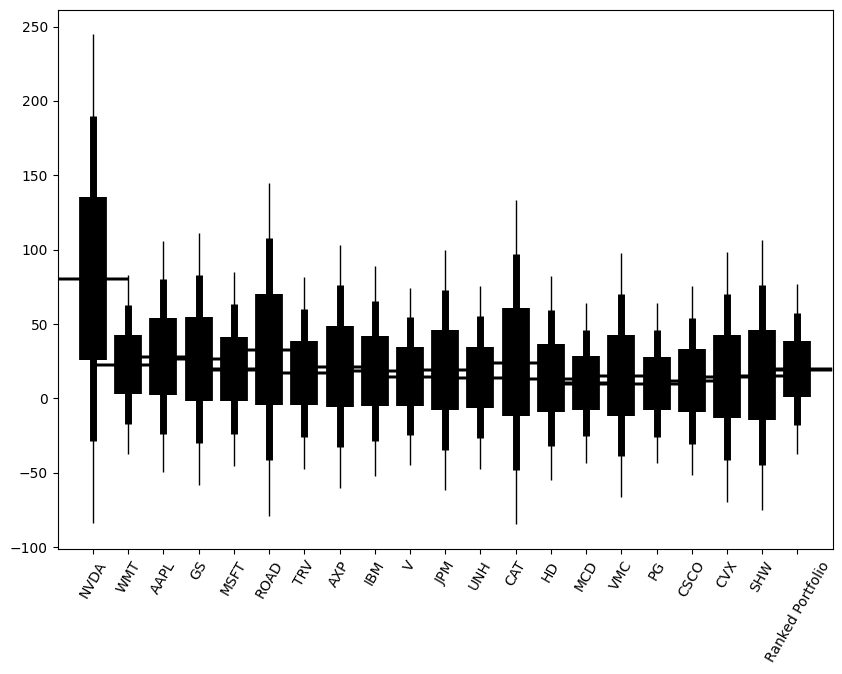

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

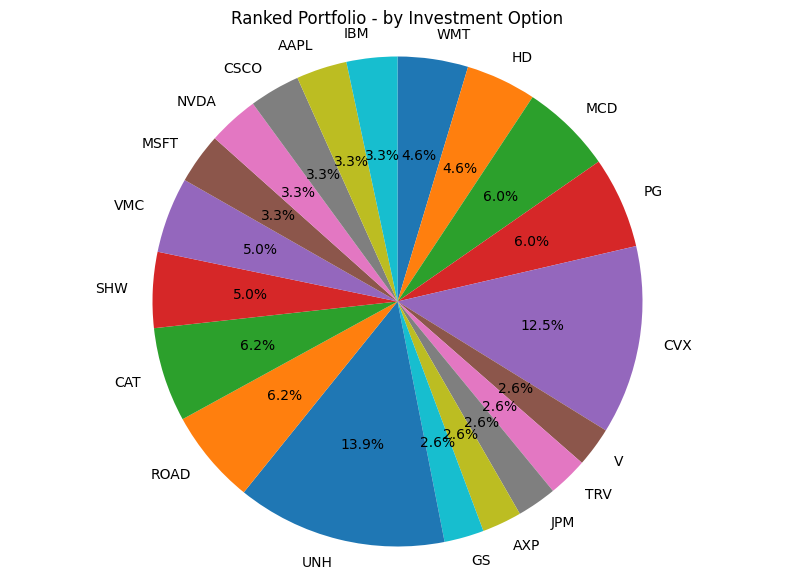

WMT    0.05
HD     0.05
MCD    0.06
PG     0.06
CVX    0.12
V      0.03
TRV    0.03
JPM    0.03
AXP    0.03
GS     0.03
UNH    0.14
ROAD   0.06
CAT    0.06
SHW    0.05
VMC    0.05
MSFT   0.03
NVDA   0.03
CSCO   0.03
AAPL   0.03
IBM    0.03



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    NVDA                           0.0335
    WMT                            0.0465
    AAPL                           0.0335
    GS                             0.0262
    MSFT                           0.0335
    ROAD                           0.0623
    TRV                            0.0262
    AXP                            0.0262
    IBM                            0.0335
    V                              0.0262
    JPM                            0.0262
    UNH                            0.1387
    CAT                            0.0623
    HD                             0.0465
    MCD                            0.0603
    VMC                            0.0500
    PG                             0.0603
    CSCO                           0.0335
    CVX                            0.1245
    SHW                            0.0500


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...................

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.34
    annual_return              25.09
    std_dev                    18.71
    worst typical down year   -12.33
    black_swan                -31.04


Ranked Portfolio Weights:
    NVDA                           0.1100
    WMT                            0.1300
    AAPL                           0.0000
    GS                             0.1600
    MSFT                           0.0700
    ROAD                           0.0000
    TRV                            0.0400
    AXP                            0.0400
    IBM                            0.0000
    V                              0.0000
    JPM                            0.0000
    UNH                            0.1200
    CAT                            0.0500
    HD                             0.0300
    MCD                            0.1200
    VMC                            0.0000
    PG                             0.080

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).